In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Для осуществления визуализации селектора, utility атаки, зависящая от расстояний до ближайшего врага и до базы, была выбрана в качестве комплексного признака. На первом графике представлена напосредственно utility-функция атаки, на втором черная область соответствует желтой области на графике ниже.

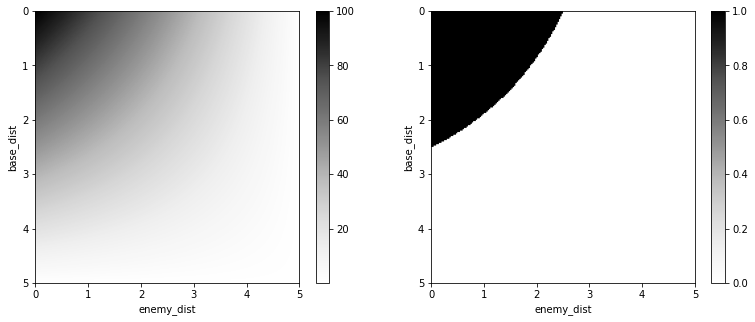

In [85]:
def attack(enemy_dist, base_dist):
    return 4 * max(0, 5 - enemy_dist) * max(0, 5 - base_dist) # here "max" is necessary...

ENEMY_DIST = np.arange(0, 5, 0.025)
BASE_DIST = np.arange(0, 5, 0.025)

img = np.zeros((ENEMY_DIST.shape[0], BASE_DIST.shape[0]))

for x, ed in enumerate(ENEMY_DIST):
    for y, bd in enumerate(BASE_DIST):
        img[x][y] = attack(ed, bd)

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(13, 5)
im = ax[0].imshow(img, extent=[0, 5, 5, 0], cmap='Greys')
ax[0].set_aspect('auto')
ax[0].set_xlabel("enemy_dist")
ax[0].set_ylabel("base_dist")
plt.colorbar(im)

im = ax[1].imshow(img > 50, extent=[0, 5, 5, 0], cmap='Greys')
ax[1].set_aspect('auto')
ax[1].set_xlabel("enemy_dist")
ax[1].set_ylabel("base_dist")
plt.colorbar(im)

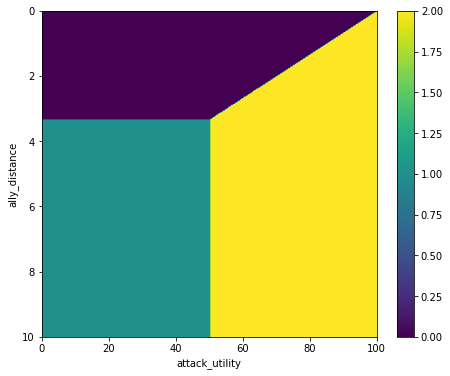

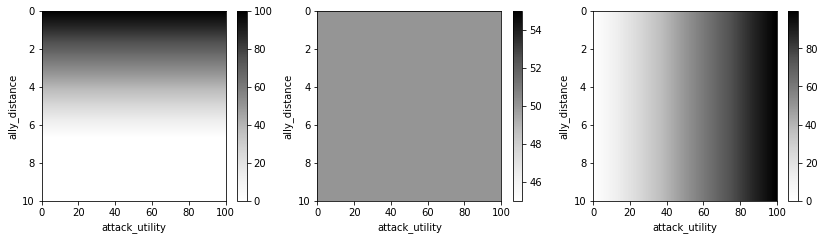

In [75]:

def random_move(ally_dist, attack_utility):
    return 10 * max(0, 10 - 1.5 * ally_dist) # ...and here "max" is only for easier comprehension of the plot of the utility function

def move_to_base(ally_dist, attack_utility):
    return 50

def attack(ally_dist, attack_utility):
    return attack_utility


ALLY_DIST = np.arange(0, 10, 0.025)
ATTACK_UTILITY = np.arange(0, 100, 0.25)
img = np.zeros((ALLY_DIST.shape[0], ATTACK_UTILITY.shape[0]))
ht = np.zeros((3, ALLY_DIST.shape[0], ATTACK_UTILITY.shape[0]))
# TODO: Vectorize
for x, ad in enumerate(ALLY_DIST):
    for y, au in enumerate(ATTACK_UTILITY):
        utility = np.array([random_move(ad, au), move_to_base(ad, au), attack(ad, au)])
        for i in range(utility.shape[0]):
            ht[i][x][y] = utility[i]
        img[x][y] = np.argmax(utility)

fig, ax = plt.subplots()
fig.set_size_inches(7.5, 6)
im = ax.imshow(img, extent=[0, 100, 10, 0])
ax.set_aspect('auto')
ax.set_xlabel("attack_utility")
ax.set_ylabel("ally_distance")
plt.colorbar(im)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 3.5)
for i in range(3):
    im = ax[i].imshow(ht[i], extent=[0, 100, 10, 0], cmap='Greys')
    ax[i].set_aspect('auto')
    ax[i].set_xlabel("attack_utility")
    ax[i].set_ylabel("ally_distance")
    plt.colorbar(im)